# Exploration of Gender Differences when Detecting and Assessing Agression and Toxicity in Wikipeda Talk Comments

## introduction and objective

I want to explore two questions using the data in these datasets. Both questions consider possible gender differences in the way the crowdworkers interpreted the Talk Page comments. One of the alleged differencs between men and women is that woman report higher Agreeableness scores in measures of the Big Five personality traits. Another is that women have greater empathy than men. (See references below.)

The difference in Agreeableness suggests the possibility that women might have--in some sense--greater reactivity to aggression than men and therefore might be more likely to flag it in the Talk Page comments. Similarly, for toxicity. Here we are operating on the assumption that Agreeableness, as a personality trait, is at odds with both aggression and toxicity.

Empathy is associated with understanding the mental or emotional state of another person. If women in general have higher empathy than men, then this could manifest in multiple ways. Women might tend to assess aggression or toxicity in the Wikipedia talk comments with greater _precision_ than men. Or women might simply tend to assess higher level of aggression and toxicity than men.

Note that detecting aggression/toxicity and assessing its level are somewhat distinct. For example, men and women could agree on which comments are toxic, but in general, disagree about the level of toxicity. There is also the scenario where men and women seem to disagree on which comments are toxic, but when they do agree, they rate the toxicity level similarly; admittedly, this second scenario seems less likely.

-  Question 1: Do women have greater sensitivity than men _in detecting_ instances of a) aggression or b) toxicity in the Talk Page comments--related to differences in Agreeableness.
-  Question 2: Do women have greater sensitivity than men _to the level_ of a) aggression or b) toxicity in the Talk Page comments--related to differences in empathy?

## References

- Weisberg, Yanna J et al. “Gender Differences in Personality across the Ten Aspects of the Big Five.” Frontiers in psychology vol. 2 178. 1 Aug. 2011, [doi:10.3389/fpsyg.2011.00178](https://dx.doi.org/10.3389%2Ffpsyg.2011.00178)
- Christov-Moore, Leonardo et al. “Empathy: gender effects in brain and behavior.” Neuroscience and biobehavioral reviews vol. 46 Pt 4, Pt 4 (2014): 604-27, [doi:10.1016/j.neubiorev.2014.09.001](https://dx.doi.org/10.1016%2Fj.neubiorev.2014.09.001).
- Mestre, María Vicenta, et al. “Are Women More Empathetic than Men? A Longitudinal Study in Adolescence.” The Spanish Journal of Psychology, vol. 12, no. 1, 2009, pp. 76–83., [doi:10.1017/S1138741600001499](https://doi.org/10.1017/S1138741600001499).



# Import required libraries and modules

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

# Data preparation

In this section, we load the datasets, merge them, and filter them, to enable our analysis.

## Load and inspect the aggression tables using pandas

In [2]:
#
# Aggression data set 
#
aggression_annotations = pd.read_csv("aggression_annotations.tsv", delimiter="\t")
aggression_annotated_comments = pd.read_csv("aggression_annotated_comments.tsv", delimiter="\t")
aggression_worker_demographics = pd.read_csv("aggression_worker_demographics.tsv", delimiter="\t")

Briefly inspect the annotation and demographic tables.

In [3]:
aggression_annotations.shape

(1365217, 4)

In [4]:
aggression_annotations.head()

,rev_id,worker_id,aggression,aggression_score
0,37675,1362,1.0,-1.0
1,37675,2408,0.0,1.0
2,37675,1493,0.0,0.0
3,37675,1439,0.0,0.0
4,37675,170,0.0,0.0


In [5]:
aggression_worker_demographics.shape

(2190, 5)

In [6]:
aggression_worker_demographics.head()

,worker_id,gender,english_first_language,age_group,education
0,833,female,0,45-60,bachelors
1,1072,male,0,30-45,bachelors
2,872,male,0,18-30,hs
3,2116,male,0,30-45,professional
4,453,male,0,30-45,hs


## Join annotation table to demographics table [Aggression]

In [7]:
joined_annotations = pd.merge( aggression_annotations, aggression_worker_demographics, left_on="worker_id", right_on="worker_id")

In [8]:
joined_annotations.shape

(855514, 8)

In [9]:
joined_annotations.head()

,rev_id,worker_id,aggression,aggression_score,gender,english_first_language,age_group,education
0,37675,1362,1.0,-1.0,male,0,18-30,masters
1,3202092,1362,0.0,0.0,male,0,18-30,masters
2,4745553,1362,0.0,0.0,male,0,18-30,masters
3,4855563,1362,0.0,0.0,male,0,18-30,masters
4,8350378,1362,0.0,0.0,male,0,18-30,masters


**Note:** In the merge, we seem to have lost a large number (37%) of the records. 

In [10]:
num_records_dropped = aggression_annotations.shape[0] - joined_annotations.shape[0]
percent_records_dropped = ( num_records_dropped / aggression_annotations.shape[0] )

'Records lost in merge: {0:,} ({1:.2%})'.format( num_records_dropped, percent_records_dropped )

'Records lost in merge: 509,703 (37.33%)'

## Separate the records by gender [Aggression]

Filter on only the male workers.

In [11]:
male_joined_aggression = joined_annotations[ ( joined_annotations.gender == "male" ) ]

In [12]:
male_joined_aggression.shape

(547328, 8)

In [13]:
male_joined_aggression.head()

,rev_id,worker_id,aggression,aggression_score,gender,english_first_language,age_group,education
0,37675,1362,1.0,-1.0,male,0,18-30,masters
1,3202092,1362,0.0,0.0,male,0,18-30,masters
2,4745553,1362,0.0,0.0,male,0,18-30,masters
3,4855563,1362,0.0,0.0,male,0,18-30,masters
4,8350378,1362,0.0,0.0,male,0,18-30,masters


In [14]:
male_joined_aggression.tail()

,rev_id,worker_id,aggression,aggression_score,gender,english_first_language,age_group,education
855508,270016254,3964,0.0,0.0,male,0,Under 18,some
855509,281960519,3964,0.0,1.0,male,0,Under 18,some
855510,289741535,3964,1.0,-1.0,male,0,Under 18,some
855511,392852210,3964,0.0,0.0,male,0,Under 18,some
855512,538094319,3964,0.0,0.0,male,0,Under 18,some


Now, filter on the female workers.

In [15]:
female_joined_aggression = joined_annotations[ ( joined_annotations.gender == "female" ) ]

In [16]:
female_joined_aggression.shape

(308103, 8)

**Note:** There are significantly fewer female workers than male workers.

In [17]:
num_male = male_joined_aggression.shape[0]
num_female = female_joined_aggression.shape[0]
total_workers = num_male + num_female
'Male workers: {0:,} ({1:.2%}) | Female workers: {2:,} ({3:.2%})'.format( num_male, ( num_male / total_workers ), num_female, ( num_female / total_workers ) )

'Male workers: 547,328 (63.98%) | Female workers: 308,103 (36.02%)'

In [18]:
female_joined_aggression.head()

,rev_id,worker_id,aggression,aggression_score,gender,english_first_language,age_group,education
1049,37675,1493,0.0,0.0,female,0,30-45,bachelors
1050,249432,1493,0.0,0.0,female,0,30-45,bachelors
1051,1212997,1493,0.0,0.0,female,0,30-45,bachelors
1052,1915850,1493,0.0,0.0,female,0,30-45,bachelors
1053,3568531,1493,0.0,0.0,female,0,30-45,bachelors


In [19]:
female_joined_aggression.tail()

,rev_id,worker_id,aggression,aggression_score,gender,english_first_language,age_group,education
855500,325237278,2826,0.0,1.0,female,0,45-60,bachelors
855501,451475220,2826,0.0,2.0,female,0,45-60,bachelors
855502,472289772,2826,0.0,3.0,female,0,45-60,bachelors
855503,519838439,2826,1.0,-3.0,female,0,45-60,bachelors
855513,192767462,4049,0.0,0.0,female,0,18-30,bachelors


## Load and inspect the toxicity tables using pandas

In [20]:
#
# Toxicity data set
#
toxicity_annotations = pd.read_csv("toxicity_annotations.tsv", delimiter="\t")
toxicity_annotated_comments = pd.read_csv("toxicity_annotated_comments.tsv", delimiter="\t")
toxicity_worker_demographics = pd.read_csv("toxicity_worker_demographics.tsv", delimiter="\t")

Briefly inspect the annotation and demographic tables.

In [21]:
toxicity_annotations.shape

(1598289, 4)

In [22]:
toxicity_annotations.head()

,rev_id,worker_id,toxicity,toxicity_score
0,2232.0,723,0,0.0
1,2232.0,4000,0,0.0
2,2232.0,3989,0,1.0
3,2232.0,3341,0,0.0
4,2232.0,1574,0,1.0


In [23]:
toxicity_worker_demographics.shape

(3591, 5)

In [24]:
toxicity_worker_demographics.head()

,worker_id,gender,english_first_language,age_group,education
0,85,female,0,18-30,bachelors
1,1617,female,0,45-60,bachelors
2,1394,female,0,NaN,bachelors
3,311,male,0,30-45,bachelors
4,1980,male,0,45-60,masters


## Join annotation table to demographics table [Toxicity]

In [25]:
joined_annotations = pd.merge( toxicity_annotations, toxicity_worker_demographics, left_on="worker_id", right_on="worker_id")

In [26]:
joined_annotations.shape

(1346955, 8)

In [27]:
joined_annotations.head()

,rev_id,worker_id,toxicity,toxicity_score,gender,english_first_language,age_group,education
0,2232.0,723,0,0.0,female,0,30-45,bachelors
1,37346.0,723,0,0.0,female,0,30-45,bachelors
2,227181.0,723,0,0.0,female,0,30-45,bachelors
3,2810755.0,723,0,0.0,female,0,30-45,bachelors
4,7270696.0,723,0,0.0,female,0,30-45,bachelors



**Note:** In this merge, we seem to have lost fewer records (`1.34%`) than when we merged the aggression dataset. 

In [28]:
num_records_dropped = aggression_annotations.shape[0] - joined_annotations.shape[0]
percent_records_dropped = ( num_records_dropped / aggression_annotations.shape[0] )

'Records lost in merge: {0:,} ({1:.2%})'.format( num_records_dropped, percent_records_dropped )

'Records lost in merge: 18,262 (1.34%)'

## Separate the records by gender [Toxicity]

Filter on only the male workers.

In [29]:
male_joined_toxicity = joined_annotations[ ( joined_annotations.gender == "male" ) ]

In [30]:
male_joined_toxicity.shape

(889251, 8)

In [31]:
male_joined_toxicity.head()

,rev_id,worker_id,toxicity,toxicity_score,gender,english_first_language,age_group,education
458,2232.0,4000,0,0.0,male,1,18-30,hs
459,1585779.0,4000,0,0.0,male,1,18-30,hs
460,3155593.0,4000,0,0.0,male,1,18-30,hs
461,5438461.0,4000,0,0.0,male,1,18-30,hs
462,6303945.0,4000,0,1.0,male,1,18-30,hs


In [32]:
male_joined_toxicity.tail()

,rev_id,worker_id,toxicity,toxicity_score,gender,english_first_language,age_group,education
1346950,486196463.0,3423,0,0.0,male,1,18-30,bachelors
1346951,495568746.0,3423,1,-1.0,male,1,18-30,bachelors
1346952,522019023.0,3423,1,-2.0,male,1,18-30,bachelors
1346953,561277725.0,3423,0,1.0,male,1,18-30,bachelors
1346954,576214285.0,3423,0,1.0,male,1,18-30,bachelors


Now, filter on the female workers.

In [33]:
female_joined_toxicity = joined_annotations[ ( joined_annotations.gender == "female" ) ]

In [34]:
female_joined_toxicity.shape

(457346, 8)

**Note:** There are significantly fewer female workers than male workers.

In [35]:
num_male = male_joined_toxicity.shape[0]
num_female = female_joined_toxicity.shape[0]
total_workers = num_male + num_female
'Male workers: {0:,} ({1:.2%}) | Female workers: {2:,} ({3:.2%})'.format( num_male, ( num_male / total_workers ), num_female, ( num_female / total_workers ) )

'Male workers: 889,251 (66.04%) | Female workers: 457,346 (33.96%)'

In [36]:
female_joined_toxicity.head()

,rev_id,worker_id,toxicity,toxicity_score,gender,english_first_language,age_group,education
0,2232.0,723,0,0.0,female,0,30-45,bachelors
1,37346.0,723,0,0.0,female,0,30-45,bachelors
2,227181.0,723,0,0.0,female,0,30-45,bachelors
3,2810755.0,723,0,0.0,female,0,30-45,bachelors
4,7270696.0,723,0,0.0,female,0,30-45,bachelors


In [37]:
female_joined_toxicity.tail()

,rev_id,worker_id,toxicity,toxicity_score,gender,english_first_language,age_group,education
1346942,455650041.0,700,0,0.0,female,0,18-30,hs
1346943,485036417.0,700,1,-1.0,female,0,18-30,hs
1346944,502517722.0,700,1,-1.0,female,0,18-30,hs
1346945,556063323.0,700,0,1.0,female,0,18-30,hs
1346946,692419927.0,700,0,0.0,female,0,18-30,hs


# Question 1: Do women have greater sensitivity than men _in detecting_ instances of a) aggression or b) toxicity in the Talk Page comments--related to differences in Agreeableness.

What is the percentage of comments that were flagged as _**aggression**_ by men versus the percentage that were flagged by women?

In [38]:
male_percent_flagged_aggression = male_joined_aggression[ 'aggression' ].sum() / male_joined_aggression[ 'aggression' ].count()
female_percent_flagged_aggression = female_joined_aggression[ 'aggression' ].sum() / female_joined_aggression[ 'aggression' ].count()
'Aggression :: Male: {0:.2%} vs Female: {1:.2%} | Delta: {2:.2%}'.format( male_percent_flagged_aggression, female_percent_flagged_aggression, abs( male_percent_flagged_aggression - female_percent_flagged_aggression) )

'Aggression :: Male: 17.56% vs Female: 19.67% | Delta: 2.11%'

What is the percentage of comments that were flagged as _**toxicity**_ by men versus the percentage that were flagged by women?

In [39]:
male_percent_flagged_toxicity = male_joined_toxicity[ 'toxicity' ].sum() / male_joined_toxicity[ 'toxicity' ].count()
female_percent_flagged_toxicity = female_joined_toxicity[ 'toxicity' ].sum() / female_joined_toxicity[ 'toxicity' ].count()
'Toxicity :: Male: {0:.2%} vs Female: {1:.2%} | Delta: {2:.2%}'.format( male_percent_flagged_toxicity, female_percent_flagged_toxicity, abs( male_percent_flagged_toxicity - female_percent_flagged_toxicity) )

'Toxicity :: Male: 13.99% vs Female: 15.71% | Delta: 1.72%'

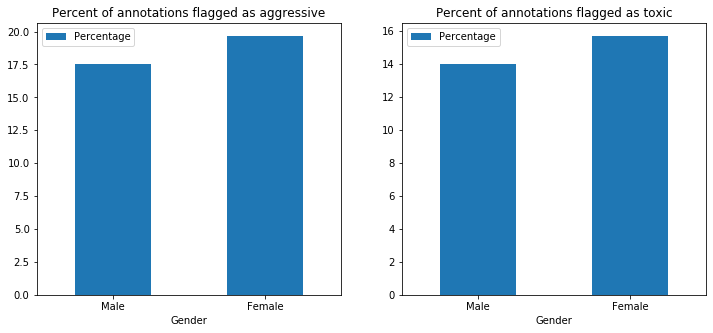

In [40]:
fig, axarr = plt.subplots(1, 2, figsize=(12, 5))
df_aggression_plot_data = pd.DataFrame({'Gender':['Male', 'Female'], 'Percentage':[male_percent_flagged_aggression * 100, female_percent_flagged_aggression * 100]})
df_aggression_plot_data.plot.bar(x='Gender', y='Percentage', rot=0, title='Percent of annotations flagged as aggressive', ax = axarr[0])

df_toxicity_plot_data = pd.DataFrame({'Gender':['Male', 'Female'], 'Percentage':[male_percent_flagged_toxicity * 100, female_percent_flagged_toxicity * 100]})
df_toxicity_plot_data.plot.bar(x='Gender', y='Percentage', rot=0, title='Percent of annotations flagged as toxic', ax = axarr[1])

# Question 2: Do women have greater sensitivity than men _to the level_ of a) aggression or b) toxicity in the Talk Page comments--related to differences in empathy? 

Compare male and female scores (aggression and toxcity) to see if males and females differ in the way that they assess levels of these attributes.

## Create histograms to compare male and female aggression scores

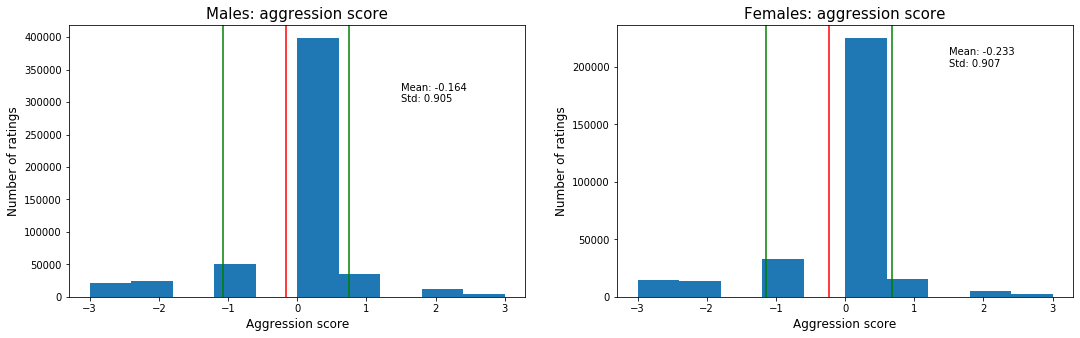

In [41]:
figure_size = [ 18, 5 ]
plt.subplot(1, 2, 1)

male_joined_aggression[ 'aggression_score' ].hist( figsize = figure_size )
plt.ylabel("Number of ratings",fontsize=12)
plt.xlabel("Aggression score",fontsize=12)
plt.title('Males: aggression score', fontsize=15)
plt.grid(None)
#
# Summary statistics: mean and std
#
mean_male = male_joined_aggression[ 'aggression_score' ].mean()
std_male = male_joined_aggression[ 'aggression_score' ].std()
s = "Mean: {0:.3}\nStd: {1:.3}".format( mean_male, std_male)
plt.text(1.5, 300000, s )
#
# Indicate mean and std with vertical lines
#
plt.axvline(x=mean_male, color='red')
plt.axvline(x=mean_male + std_male, color='green')
plt.axvline(x=mean_male - std_male, color='green')


plt.subplot(1, 2, 2)

female_joined_aggression[ 'aggression_score' ].hist( figsize = figure_size )
plt.ylabel("Number of ratings",fontsize=12)
plt.xlabel("Aggression score",fontsize=12)
plt.title('Females: aggression score', fontsize=15)
plt.grid(None)
#
# Summary statistics: mean and std
#
mean_female = female_joined_aggression[ 'aggression_score' ].mean()
std_female = female_joined_aggression[ 'aggression_score' ].std()
s = "Mean: {0:.3}\nStd: {1:.3}".format( mean_female, std_female)
plt.text(1.5, 200000, s )
#
# Indicate mean and std with vertical lines
#
plt.axvline(x=mean_female, color='red')
plt.axvline(x=mean_female + std_female, color='green')
plt.axvline(x=mean_female - std_female, color='green')

We _aren't_ seeing much difference here. The means differ by `0.069` units and the standard deviations differ by `0.002`. Women appear to rate aggressiveness at `-3` more than `-2` and men the reverse, but without further analysis, I'm not sure how much we can make of that. Otherwise, even the shapes of the histograms are similar.

## Create histograms to compare male and female toxicity scores

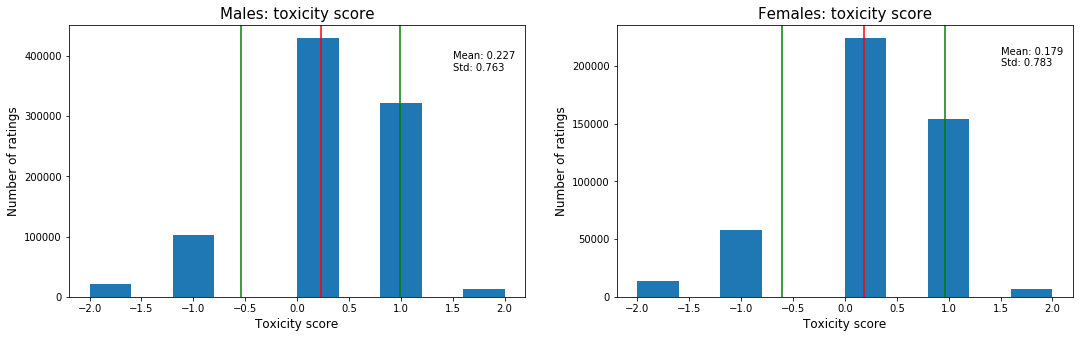

In [42]:
figure_size = [ 18, 5 ]
plt.subplot(1, 2, 1)

male_joined_toxicity[ 'toxicity_score' ].hist( figsize = figure_size )
plt.ylabel("Number of ratings",fontsize=12)
plt.xlabel("Toxicity score",fontsize=12)
plt.title('Males: toxicity score', fontsize=15)
plt.grid(None)
#
# Summary statistics: mean and std
#
mean_male = male_joined_toxicity[ 'toxicity_score' ].mean()
std_male = male_joined_toxicity[ 'toxicity_score' ].std()
s = "Mean: {0:.3}\nStd: {1:.3}".format( mean_male, std_male)
plt.text(1.5, 375000, s )
#
# Indicate mean and std with vertical lines
#
plt.axvline(x=mean_male, color='red')
plt.axvline(x=mean_male + std_male, color='green')
plt.axvline(x=mean_male - std_male, color='green')


plt.subplot(1, 2, 2)

female_joined_toxicity[ 'toxicity_score' ].hist( figsize = figure_size )
plt.ylabel("Number of ratings",fontsize=12)
plt.xlabel("Toxicity score",fontsize=12)
plt.title('Females: toxicity score', fontsize=15)
plt.grid(None)
#
# Summary statistics: mean and std
#
mean_female = female_joined_toxicity[ 'toxicity_score' ].mean()
std_female = female_joined_toxicity[ 'toxicity_score' ].std()
s = "Mean: {0:.3}\nStd: {1:.3}".format( mean_female, std_female)
plt.text(1.5, 200000, s )
#`
# Indicate mean and std with vertical lines
#
plt.axvline(x=mean_female, color='red')
plt.axvline(x=mean_female + std_female, color='green')
plt.axvline(x=mean_female - std_female, color='green')

In this case (toxicity), the means differ by `0.048` and the standard deviations differ by `0.02`. Also, these two histograms have similar shapes. In fact, they look so similar that if the y-axes didn't have different values, I would suspect that they were the same. 

Based on these two sets of histograms, I can't conclude that there is a difference in the way that men and women evaluate aggression or toxicity in the Wikipedia Talk Page comments.

## Appendix: Male and female comparison of demographic characteristics

This section compares age and education demographics for the male and female workers.

### Note on ordering the levels on the x-axis of the histograms for categorical variables

For the education and age histograms, I needed to engage in some _gymnastics_ in order for the values on the x-axis to come out in a reasonable order. The process involves creating a mapping between the levels of the columns and an ordered set of non-negative integers. Then we use that mapping to create an additional column in the dataframe that we can use to sort the levels.

In [43]:
edu_groups = ['none', 'some', 'hs', 'bachelors', 'masters', 'professional', 'doctorate']
mapping = {edu_map: i for i, edu_map in enumerate(edu_groups)}
#
# Here is what the mapping looks like.
#
mapping

{'none': 0,
 'some': 1,
 'hs': 2,
 'bachelors': 3,
 'masters': 4,
 'professional': 5,
 'doctorate': 6}

## Join annotation table to demographics table [Toxicity]

In [44]:
joined_annotations = pd.merge( toxicity_annotations, toxicity_worker_demographics, left_on="worker_id", right_on="worker_id")

In [45]:
joined_annotations.shape

(1346955, 8)

In [46]:
joined_annotations.head()

,rev_id,worker_id,toxicity,toxicity_score,gender,english_first_language,age_group,education
0,2232.0,723,0,0.0,female,0,30-45,bachelors
1,37346.0,723,0,0.0,female,0,30-45,bachelors
2,227181.0,723,0,0.0,female,0,30-45,bachelors
3,2810755.0,723,0,0.0,female,0,30-45,bachelors
4,7270696.0,723,0,0.0,female,0,30-45,bachelors


**Note:** In the merge, we seem to have lost a large number (37%) of the records. 

In [47]:
num_records_dropped = aggression_annotations.shape[0] - joined_annotations.shape[0]
percent_records_dropped = ( num_records_dropped / aggression_annotations.shape[0] )

'Records lost in merge: {0:,} ({1:.2%})'.format( num_records_dropped, percent_records_dropped )

'Records lost in merge: 18,262 (1.34%)'

## Load and inspect the toxicity tables using pandas

## Separate the records by gender [Toxicity]

Filter on only the male workers.

In [48]:
male_joined_toxicity = joined_annotations[ ( joined_annotations.gender == "male" ) ]

In [49]:
male_joined_toxicity.shape

(889251, 8)

In [50]:
male_joined_toxicity.head()

,rev_id,worker_id,toxicity,toxicity_score,gender,english_first_language,age_group,education
458,2232.0,4000,0,0.0,male,1,18-30,hs
459,1585779.0,4000,0,0.0,male,1,18-30,hs
460,3155593.0,4000,0,0.0,male,1,18-30,hs
461,5438461.0,4000,0,0.0,male,1,18-30,hs
462,6303945.0,4000,0,1.0,male,1,18-30,hs


In [51]:
male_joined_toxicity.tail()

,rev_id,worker_id,toxicity,toxicity_score,gender,english_first_language,age_group,education
1346950,486196463.0,3423,0,0.0,male,1,18-30,bachelors
1346951,495568746.0,3423,1,-1.0,male,1,18-30,bachelors
1346952,522019023.0,3423,1,-2.0,male,1,18-30,bachelors
1346953,561277725.0,3423,0,1.0,male,1,18-30,bachelors
1346954,576214285.0,3423,0,1.0,male,1,18-30,bachelors


Now, filter on the female workers.

In [52]:
female_joined_toxicity = joined_annotations[ ( joined_annotations.gender == "female" ) ]

In [53]:
female_joined_toxicity.shape

(457346, 8)

**Note:** There are significantly fewer female workers than male workers.

In [54]:
num_male = male_joined_toxicity.shape[0]
num_female = female_joined_toxicity.shape[0]
total_workers = num_male + num_female
'Male workers: {0:,} ({1:.2%}) | Female workers: {2:,} ({3:.2%})'.format( num_male, ( num_male / total_workers ), num_female, ( num_female / total_workers ) )

'Male workers: 889,251 (66.04%) | Female workers: 457,346 (33.96%)'

In [55]:
female_joined_toxicity.head()

,rev_id,worker_id,toxicity,toxicity_score,gender,english_first_language,age_group,education
0,2232.0,723,0,0.0,female,0,30-45,bachelors
1,37346.0,723,0,0.0,female,0,30-45,bachelors
2,227181.0,723,0,0.0,female,0,30-45,bachelors
3,2810755.0,723,0,0.0,female,0,30-45,bachelors
4,7270696.0,723,0,0.0,female,0,30-45,bachelors


In [56]:
female_joined_toxicity.tail()

,rev_id,worker_id,toxicity,toxicity_score,gender,english_first_language,age_group,education
1346942,455650041.0,700,0,0.0,female,0,18-30,hs
1346943,485036417.0,700,1,-1.0,female,0,18-30,hs
1346944,502517722.0,700,1,-1.0,female,0,18-30,hs
1346945,556063323.0,700,0,1.0,female,0,18-30,hs
1346946,692419927.0,700,0,0.0,female,0,18-30,hs


In [59]:
edu_map = male_joined_aggression['education'].map(mapping)
#
# Here is the result of running the mapping on the 'education' column
#
edu_map

0         4
1         4
2         4
3         4
4         4
         ..
855508    1
855509    1
855510    1
855511    1
855512    1
Name: education, Length: 547328, dtype: int64

In [61]:
#
# The series has the name of the column that we mapped from. In this case, 'education'.
# Need to change that so we don't end up with two columns named 'education' in the dataframe.
#
edu_map = edu_map.rename( 'edu_sort')

Text(0.5, 1.0, 'Males: education')

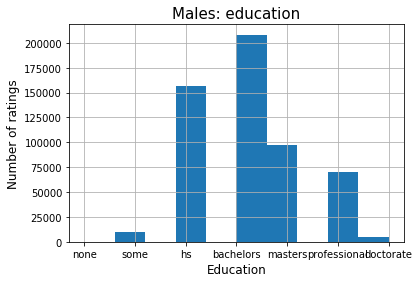

In [62]:
pd.concat( [male_joined_aggression, edu_map ], axis = 1).sort_values( by = 'edu_sort')[ 'education' ].hist()
plt.ylabel("Number of ratings",fontsize=12)
plt.xlabel("Education",fontsize=12)
plt.title('Males: education', fontsize=15)

We use the following code to enable ordering the columns of the histogram in a reasonable way. For more detail, see the proceeding discussion regarding the 'education' column.

In [63]:
age_groups = ['Under 18', '18-30', '30-45', '45-60', 'Over 60']
mapping = {age_map: i for i, age_map in enumerate( age_groups )}
age_map = male_joined_aggression[ 'age_group' ].map( mapping )
age_map = age_map.rename( 'age_sort' )

Text(0.5, 1.0, 'Males: age')

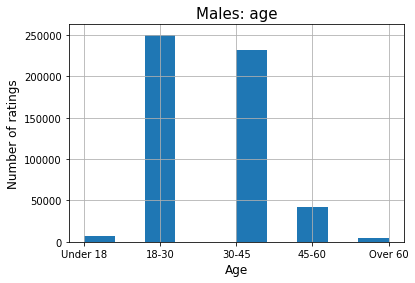

In [64]:
pd.concat( [male_joined_aggression, age_map ], axis = 1).sort_values( by = 'age_sort')[ 'age_group' ].hist()
plt.ylabel("Number of ratings",fontsize=12)
plt.xlabel("Age",fontsize=12)
plt.title('Males: age', fontsize=15)